# Pre-Req:

In [2]:
#Project Imports:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
import seaborn as sns
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import train_test_split



In [3]:
#Train Dataset
TrainDataset = pd.read_csv('/content/train.csv')
TrainDataset.head()

,id,date,country,store,product,num_sold
0,0,2010-01-01,Canada,Discount Stickers,Holographic Goose,NaN
1,1,2010-01-01,Canada,Discount Stickers,Kaggle,973.0
2,2,2010-01-01,Canada,Discount Stickers,Kaggle Tiers,906.0
3,3,2010-01-01,Canada,Discount Stickers,Kerneler,423.0
4,4,2010-01-01,Canada,Discount Stickers,Kerneler Dark Mode,491.0


In [4]:
TrainDataset.shape

(230130, 6)

In [5]:
#Test Dataset
TestDataset = pd.read_csv('/content/test.csv')
TestDataset.head()

,id,date,country,store,product
0,230130,2017-01-01,Canada,Discount Stickers,Holographic Goose
1,230131,2017-01-01,Canada,Discount Stickers,Kaggle
2,230132,2017-01-01,Canada,Discount Stickers,Kaggle Tiers
3,230133,2017-01-01,Canada,Discount Stickers,Kerneler
4,230134,2017-01-01,Canada,Discount Stickers,Kerneler Dark Mode


In [6]:
TestDataset.shape

(98550, 5)

# Data Clean-Up:

In [7]:
#Check Null columns in Train Dataset
TrainDataset.isnull().sum()

,0
id,0
date,0
country,0
store,0
product,0
num_sold,8871


In [8]:
#Train Dataset Clean-Up:

####################################Missing Values Clean####################################

###########################################num_sold

#Get num_sold Average
NumSold = TrainDataset['num_sold'].mean()
#Fill Values
TrainDataset['num_sold'] = TrainDataset['num_sold'].fillna(NumSold)

####################################Encoding Categorical Into Numerical####################################

###########################################product

ProductEnc = {
    'Holographic Goose': 1,
    'Kaggle': 2,
    'Kaggle Tiers': 3,
    'Kerneler' : 4,
    'Kerneler Dark Mode' : 5,
    ' ' :6
}

Null = 7

TrainDataset['product'] = TrainDataset['product'].map(ProductEnc)
TrainDataset['product'] = TrainDataset['product'].fillna(Null)

###########################################store

StoreEnc = {
    'Discount Stickers': 1,
    'Stickers for Less': 2,
    'Premium Sticker Mart': 3,
    ' ' : 4
}

Null = 5

TrainDataset['store'] = TrainDataset['store'].map(StoreEnc)
TrainDataset['store'] = TrainDataset['store'].fillna(Null)

###########################################country

CountryEnc = {
    'Canada': 1,
    'Finland': 2,
    'Italy': 3,
    'Kenya' : 4,
    'Norway': 5,
    'Singapore': 6,
}

Null = 7

TrainDataset['country'] = TrainDataset['country'].map(CountryEnc)
TrainDataset['country'] = TrainDataset['country'].fillna(Null)

###########################################date
TrainDataset['date'] = pd.to_datetime(TrainDataset['date'])
TrainDataset['date'] = TrainDataset['date'].dt.strftime('%Y%m%d').astype(int)



In [9]:
TrainDataset.head()

,id,date,country,store,product,num_sold
0,0,20100101,1,1,1,752.527382
1,1,20100101,1,1,2,973.000000
2,2,20100101,1,1,3,906.000000
3,3,20100101,1,1,4,423.000000
4,4,20100101,1,1,5,491.000000


In [10]:
#Check Traindataset is completley numeric

all_numeric = TrainDataset.applymap(lambda x: isinstance(x, (int, float))).all().all()

print(f"Are all values numeric? {all_numeric}")

<ipython-input-10-e256ebf0ef36>:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  all_numeric = TrainDataset.applymap(lambda x: isinstance(x, (int, float))).all().all()


Are all values numeric? True


In [11]:
#Check Null columns in Test Dataset
TestDataset.isnull().sum()

,0
id,0
date,0
country,0
store,0
product,0


In [12]:
#Test Dataset Clean-Up:

####################################Missing Values Clean####################################

####################################Encoding Categorical Into Numerical####################################

###########################################product

ProductEnc = {
    'Holographic Goose': 1,
    'Kaggle': 2,
    'Kaggle Tiers': 3,
    'Kerneler' : 4,
    'Kerneler Dark Mode' : 5,
    ' ' :6
}

Null = 7

TestDataset['product'] = TestDataset['product'].map(ProductEnc)
TestDataset['product'] = TestDataset['product'].fillna(Null)

###########################################store

StoreEnc = {
    'Discount Stickers': 1,
    'Stickers for Less': 2,
    'Premium Sticker Mart': 3,
    ' ' : 4
}

Null = 5

TestDataset['store'] = TestDataset['store'].map(StoreEnc)
TestDataset['store'] = TestDataset['store'].fillna(Null)

###########################################country

CountryEnc = {
    'Canada': 1,
    'Finland': 2,
    'Italy': 3,
    'Kenya' : 4,
    'Norway': 5,
    'Singapore': 6,
}

Null = 7

TestDataset['country'] = TestDataset['country'].map(CountryEnc)
TestDataset['country'] = TestDataset['country'].fillna(Null)

###########################################date
TestDataset['date'] = pd.to_datetime(TestDataset['date'])
TestDataset['date'] = TestDataset['date'].dt.strftime('%Y%m%d').astype(int)


In [13]:
TestDataset.head(1000)

,id,date,country,store,product
0,230130,20170101,1,1,1
1,230131,20170101,1,1,2
2,230132,20170101,1,1,3
3,230133,20170101,1,1,4
4,230134,20170101,1,1,5
...,...,...,...,...,...
995,231125,20170112,1,2,1
996,231126,20170112,1,2,2
997,231127,20170112,1,2,3
998,231128,20170112,1,2,4


In [14]:
#Check Traindataset is completley numeric

all_numeric = TestDataset.applymap(lambda x: isinstance(x, (int, float))).all().all()

print(f"Are all values numeric? {all_numeric}")

Are all values numeric? True


<ipython-input-14-b4fbbe99d19c>:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  all_numeric = TestDataset.applymap(lambda x: isinstance(x, (int, float))).all().all()


# Data Analysis:

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230130 entries, 0 to 230129
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   id        230130 non-null  int64  
 1   date      230130 non-null  object 
 2   country   230130 non-null  object 
 3   store     230130 non-null  object 
 4   product   230130 non-null  object 
 5   num_sold  221259 non-null  float64
dtypes: float64(1), int64(1), object(4)
memory usage: 10.5+ MB
None

Summary Statistics:
                  id       num_sold
count  230130.000000  221259.000000
mean   115064.500000     752.527382
std     66432.953062     690.165445
min         0.000000       5.000000
25%     57532.250000     219.000000
50%    115064.500000     605.000000
75%    172596.750000    1114.000000
max    230129.000000    5939.000000

Missing Values:
id             0
date           0
country        0
store          0
product        0
num_sold    8871
dtype: int64


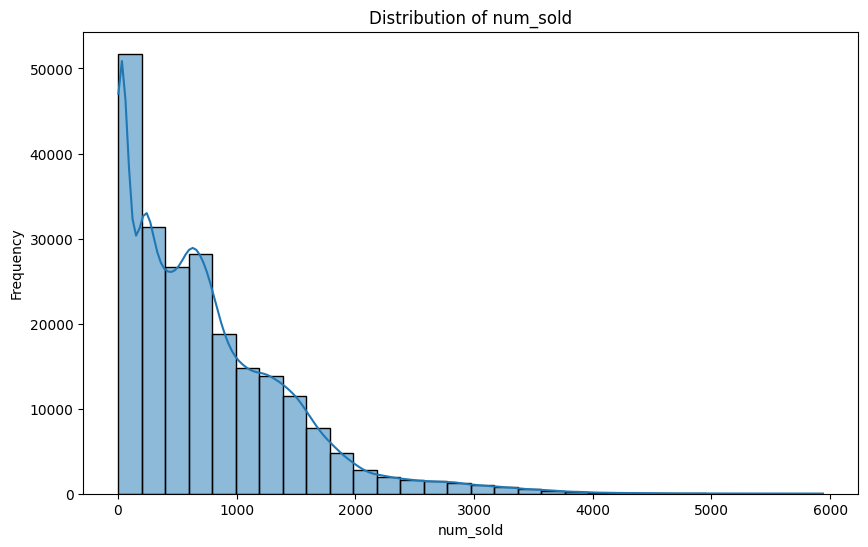

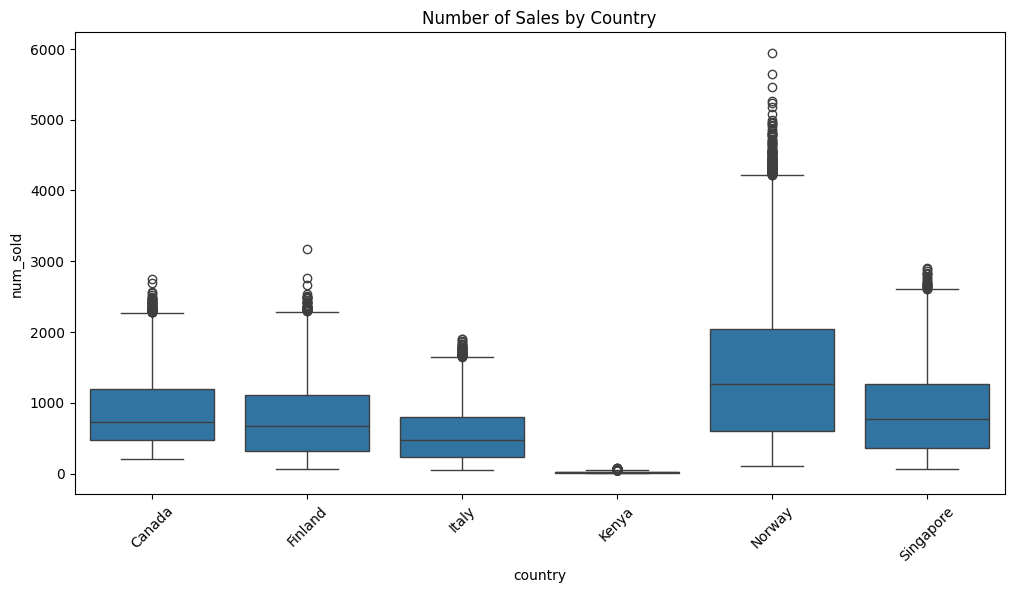

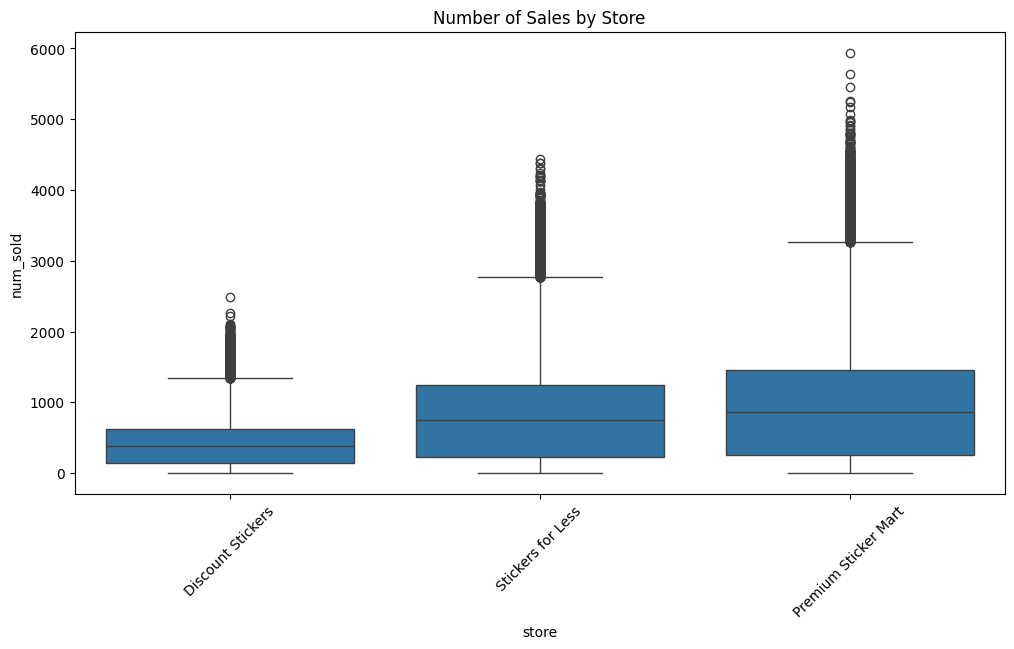

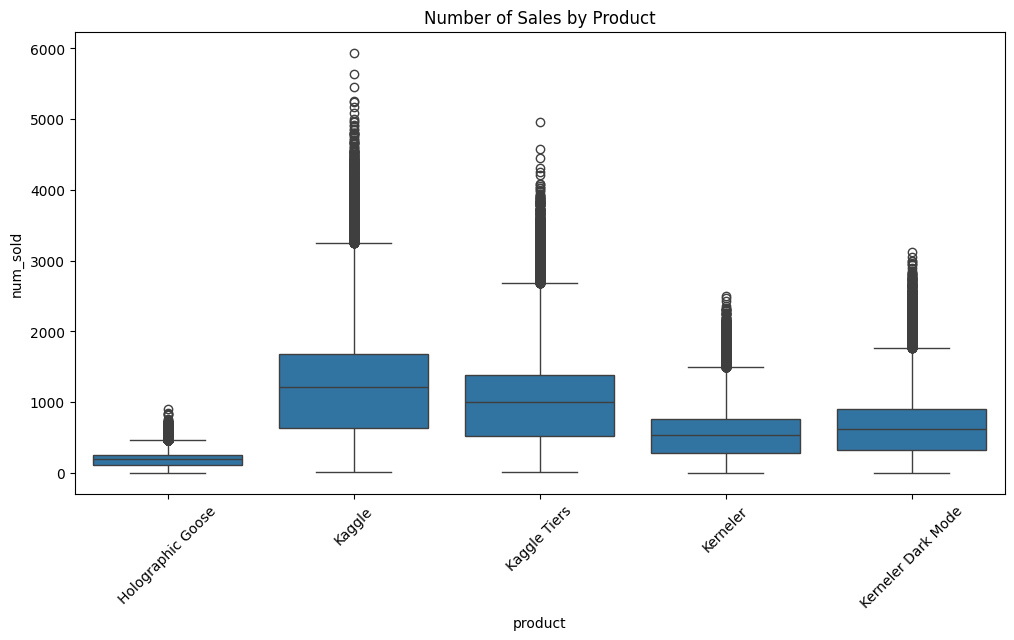

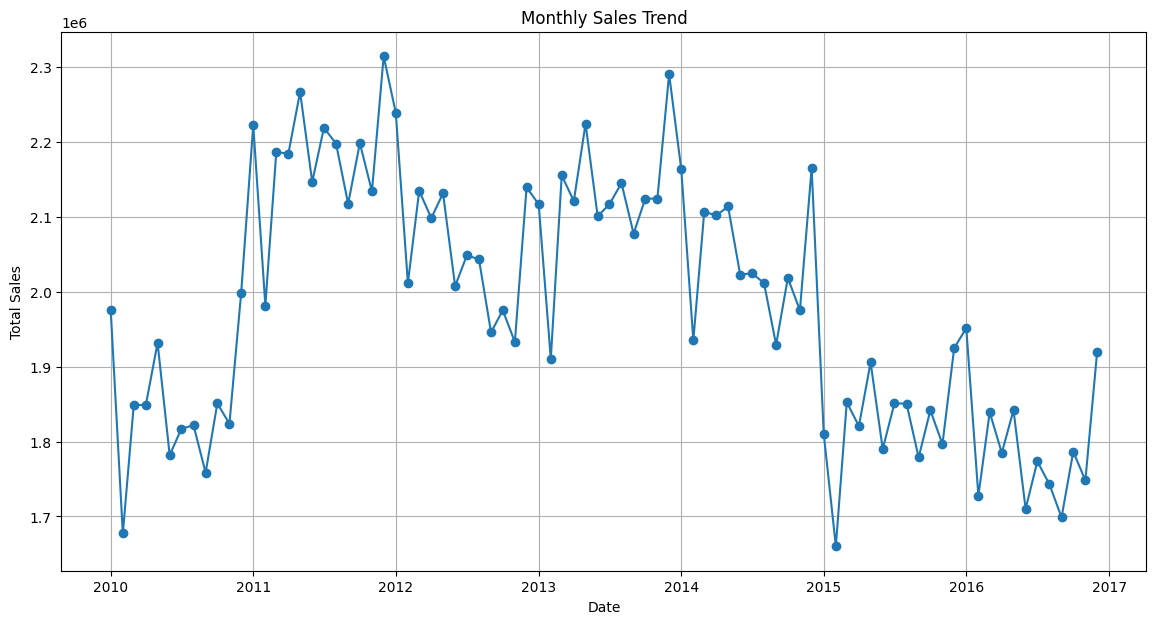

Data analysis complete.


In [15]:
# Load dataset
file_path = '/content/train.csv'  # Replace with your actual file path
data = pd.read_csv(file_path)

# Basic Information
print("Dataset Info:")
print(data.info())
print("\nSummary Statistics:")
print(data.describe())

# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())

# Distribution of num_sold
plt.figure(figsize=(10, 6))
sns.histplot(data['num_sold'], bins=30, kde=True)
plt.title('Distribution of num_sold')
plt.xlabel('num_sold')
plt.ylabel('Frequency')
plt.show()

# Sales by Country
plt.figure(figsize=(12, 6))
sns.boxplot(x='country', y='num_sold', data=data)
plt.title('Number of Sales by Country')
plt.xticks(rotation=45)
plt.show()

# Sales by Store
plt.figure(figsize=(12, 6))
sns.boxplot(x='store', y='num_sold', data=data)
plt.title('Number of Sales by Store')
plt.xticks(rotation=45)
plt.show()

# Sales by Product
plt.figure(figsize=(12, 6))
sns.boxplot(x='product', y='num_sold', data=data)
plt.title('Number of Sales by Product')
plt.xticks(rotation=45)
plt.show()

# Time Series Analysis
data['date'] = pd.to_datetime(data['date'])
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month

grouped = data.groupby(['year', 'month'])['num_sold'].sum().reset_index()
grouped['date'] = pd.to_datetime(grouped[['year', 'month']].assign(day=1))

plt.figure(figsize=(14, 7))
plt.plot(grouped['date'], grouped['num_sold'], marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

print("Data analysis complete.")


# Regression Model 1 -Linear Regression:

In [16]:
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.linear_model import LinearRegression
import pandas as pd

# Prepare training data
X_train = TrainDataset.drop(columns=['num_sold', 'id'])  # Features
y_train = TrainDataset['num_sold']  # Target

# Prepare test data
X_test = TestDataset.drop(columns=['id'])  # Test features only

# Train regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict the num_sold for the training dataset to compute MAPE
train_predictions = model.predict(X_train)

# Compute MAPE on the training data
train_mape = mean_absolute_percentage_error(y_train, train_predictions)
print(f"Training MAPE: {train_mape * 100:.2f}%")

# Predict the num_sold for the test dataset
predictions = model.predict(X_test)

# Create a submission DataFrame with exact row count and format
submission = pd.DataFrame({
    'id': TestDataset['id'],  # Ensure alignment with test dataset IDs
    'num_sold': predictions  # Predicted values
})

# Save to CSV
submission.to_csv('PredictionsModel1LoganKaggle.csv', index=False)

print(f"Submission file 'PredictionsModel1LoganKaggle.csv' created with {len(submission)} rows.")

Training MAPE: 856.43%
Submission file 'PredictionsModel1LoganKaggle.csv' created with 98550 rows.


# Regression Model 2 - Decision Tree:

In [17]:
# Prepare training data
X_train = TrainDataset.drop(columns=['num_sold', 'id'])  # Features
y_train = TrainDataset['num_sold']  # Target variable

# Prepare test data
X_test = TestDataset.drop(columns=['id'])  # Test features

# Train Decision Tree Regressor
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# Predict the num_sold for the training dataset to compute MAPE
train_predictions = model.predict(X_train)

# Compute MAPE on the training data
train_mape = mean_absolute_percentage_error(y_train, train_predictions)
print(f"Training MAPE: {train_mape * 100:.2f}%")

# Predict the num_sold for the test dataset
predictions = model.predict(X_test)

# Create a submission DataFrame
submission = pd.DataFrame({
    'id': TestDataset['id'],  # Retain IDs from test dataset
    'num_sold': predictions  # Predicted values
})

# Save to CSV file
submission.to_csv('PredictionsModel2LoganKaggle.csv', index=False)

print(f"Submission file 'PredictionsModel2LoganKaggle.csv' created with {len(submission)} rows.")

Training MAPE: 16.77%
Submission file 'PredictionsModel2LoganKaggle.csv' created with 98550 rows.


#Regression Model 3 - Neural Network:

In [18]:
# Prepare training data
X_train = TrainDataset.drop(columns=['num_sold', 'id'])  # Features
y_train = TrainDataset['num_sold']  # Target variable

# Prepare test data
X_test = TestDataset.drop(columns=['id'])  # Test features

# Standardize the data for Neural Network
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Neural Network Regressor
model = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=500, random_state=50)
model.fit(X_train_scaled, y_train)

# Predict the num_sold for the training dataset to compute MAPE
train_predictions = model.predict(X_train_scaled)

# Compute MAPE on the training data
train_mape = mean_absolute_percentage_error(y_train, train_predictions)
print(f"Training MAPE: {train_mape * 100:.2f}%")

# Predict the num_sold for the test dataset
predictions = model.predict(X_test_scaled)

# Create a submission DataFrame
submission = pd.DataFrame({
    'id': TestDataset['id'],  # Retain IDs from test dataset
    'num_sold': predictions  # Predicted values
})

# Save to CSV file
submission.to_csv('PredictionsModel3LoganKaggle.csv', index=False)

print(f"Submission file 'PredictionsModel3LoganKaggle.csv' created with {len(submission)} rows.")

Training MAPE: 68.16%
Submission file 'PredictionsModel3LoganKaggle.csv' created with 98550 rows.


#Regression Model 4 - Gradient Boosting Regressor with hyperparameter tuning using GridSearchCV




In [19]:
# Prepare training data
X_train = TrainDataset.drop(columns=['num_sold', 'id'])  # Features
y_train = TrainDataset['num_sold']  # Target

# Prepare test data
X_test = TestDataset.drop(columns=['id'])  # Features only

# Set up Gradient Boosting Regressor with hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

model = GradientBoostingRegressor()
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Best model from grid search
best_model = grid_search.best_estimator_

# Predict the num_sold for the training dataset to compute MAPE
train_predictions = best_model.predict(X_train)

# Compute MAPE on the training data
train_mape = mean_absolute_percentage_error(y_train, train_predictions)
print(f"Training MAPE: {train_mape * 100:.2f}%")

# Predict the num_sold for the test dataset
predictions = best_model.predict(X_test)

# Compute MAPE on the test data
# Since we don't have true labels for the test set, we can skip MAPE for the test set
# but you can compute MAPE on validation set or use true values from the competition if available

# Create a submission DataFrame with exact row count and format
submission = pd.DataFrame({
    'id': TestDataset['id'],  # Ensure alignment with test dataset IDs
    'num_sold': predictions  # Predicted values
})

# Save to CSV
submission.to_csv('PredictionsModel4LoganKaggle.csv', index=False)

print(f"Submission file 'PredictionsModel4LoganKaggle.csv' created with {len(submission)} rows.")

Training MAPE: 89.43%
Submission file 'PredictionsModel4LoganKaggle.csv' created with 98550 rows.


#Regression Model 5 - XGB


In [20]:
# Prepare training data
X_train = TrainDataset.drop(columns=['num_sold', 'id'])  # Features
y_train = TrainDataset['num_sold']  # Target

# Prepare test data
X_test = TestDataset.drop(columns=['id'])  # Features only

# Split training data for validation
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Train XGBoost Regressor
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=200, learning_rate=0.1, max_depth=5, subsample=0.8, colsample_bytree=0.8)
model.fit(X_train_split, y_train_split)

# Validate the model
val_predictions = model.predict(X_val)
mape = mean_absolute_percentage_error(y_val, val_predictions)
print(f"Validation MAPE: {mape:.2%}")

# Predict the num_sold for the test dataset
predictions = model.predict(X_test)

# Create a submission DataFrame with exact row count and format
submission = pd.DataFrame({
    'id': TestDataset['id'],  # Ensure alignment with test dataset IDs
    'num_sold': predictions  # Predicted values
})

# Save to CSV
submission.to_csv('PredictionsModel5LoganKaggle.csv', index=False)

print(f"Submission file 'PredictionsModel5LoganKaggle.csv' created with {len(submission)} rows.")

Validation MAPE: 83.29%
Submission file 'PredictionsModel5LoganKaggle.csv' created with 98550 rows.
